# <b>Avalia o comportamento da Rede</b>

In [1]:
# Importando as dependências
from quantumnet.objects import logger
from simulations import *
from copy import deepcopy
import csv
import matplotlib.pyplot as plt
logger.deactivate()

Parâmetros da Simulação

In [2]:
from simulation_parameters import *
requests = generate_traffic(request_info)
request_proactive = deepcopy(requests)
request_reactive = deepcopy(requests)
request_hybrid = deepcopy(requests)

### <b>Preenchimento Proativo</b>

In [8]:
sim = Sim(network_info, controller_info)
sim.set_file_data_network('proativo.csv')
sim.set_file_data_requests('proativo.csv')
sim.requests = request_proactive
sim.proactive_filling(proactive_params)
sim.proactive_process_requests()
sim.end()

### <b>Preenchimento Reativo</b>

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info)
sim.set_file_data_network('reativo.csv')
sim.set_file_data_requests('reativo.csv')
sim.requests = request_reactive
sim.reactive_process_requests()
sim.end()

### <b>Preenchimento Híbrido</b>

In [5]:
# Inicializando a simulação
sim = Sim(network_info, controller_info)
sim.set_file_data_network('hibrido.csv')
sim.set_file_data_requests('hibrido.csv')
sim.requests = request_hybrid
sim.hibrid_initial_filling(proactive_params)
sim.reactive_process_requests()
sim.end()

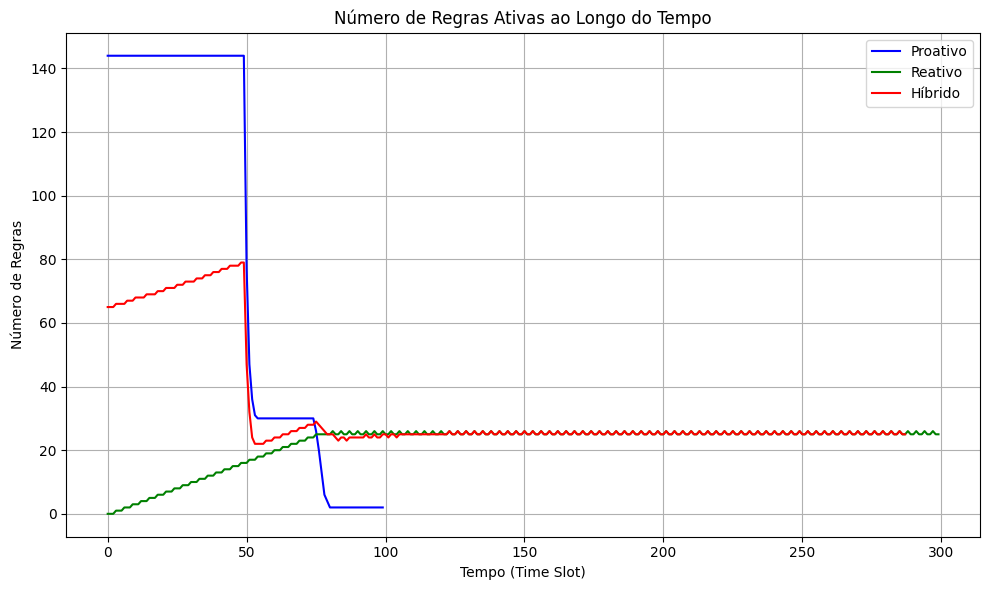

In [6]:
def plot_rules_over_time(filenames, labels, colors):
    """
    Gera um único gráfico com o número de regras ativas ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterar sobre os arquivos e suas configurações (labels e cores)
    for filename, label, color in zip(filenames, labels, colors):
        time_slots = []
        rules_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                rules_active.append(int(row["rules_active"]))

        # Adicionar uma linha ao gráfico
        plt.plot(time_slots, rules_active, linestyle="-", color=color, label=label)
    
    # Configurações do gráfico
    plt.title("Número de Regras Ativas ao Longo do Tempo")
    plt.xlabel("Tempo (Time Slot)")
    plt.ylabel("Número de Regras")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Configuração dos arquivos, rótulos e cores
filenames = [
    'resultados/analise_rede/proativo.csv',
    'resultados/analise_rede/reativo.csv',
    'resultados/analise_rede/hibrido.csv'
]
labels = ['Proativo', 'Reativo', 'Híbrido']
colors = ['b', 'g', 'r']

# Gerar o gráfico
plot_rules_over_time(filenames, labels, colors)


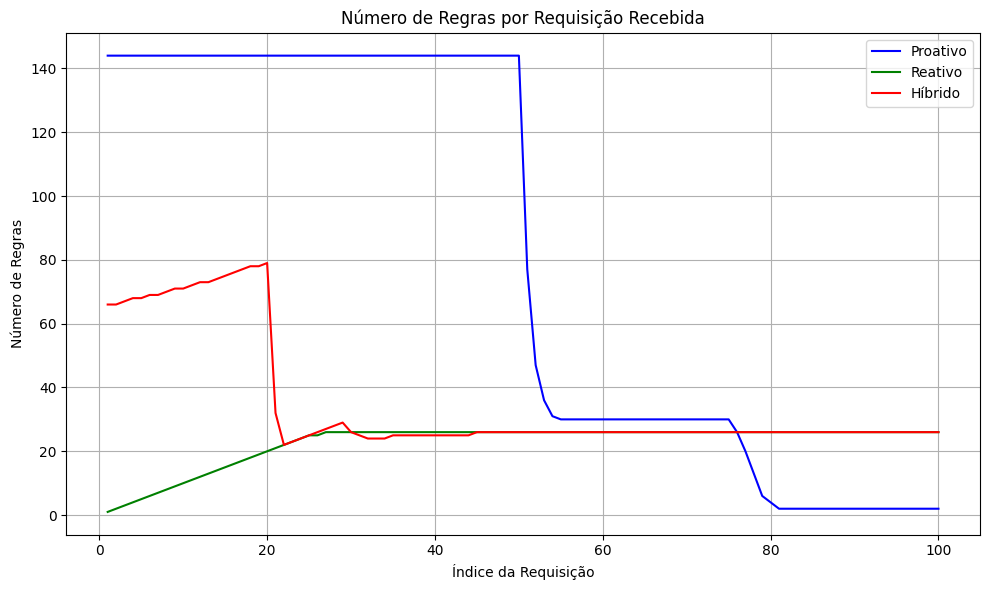

In [7]:
def plot_rules_per_request(filenames, labels, colors):
    """
    Gera um único gráfico com o número de regras por requisição recebida,
    considerando a nova estrutura do arquivo CSV.

    Args:
        filenames (list): Lista de caminhos para os arquivos CSV.
        labels (list): Lista de rótulos para cada arquivo.
        colors (list): Lista de cores para cada linha do gráfico.
    """
    plt.figure(figsize=(10, 6))

    for filename, label, color in zip(filenames, labels, colors):
        indices = []  # Índice de cada requisição
        rules_active = []  # Número de regras por requisição

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for idx, row in enumerate(reader):
                indices.append(idx + 1)  # O índice é a linha da requisição (começando em 1)
                rules_active.append(int(row["num_rules"]))

        # Adicionar uma linha ao gráfico
        plt.plot(indices, rules_active, linestyle="-", color=color, label=label)

    # Configurações do gráfico
    plt.title("Número de Regras por Requisição Recebida")
    plt.xlabel("Índice da Requisição")
    plt.ylabel("Número de Regras")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Configuração dos arquivos, rótulos e cores
filenames = [
    'resultados/analise_requests/proativo.csv',
    'resultados/analise_requests/reativo.csv',
    'resultados/analise_requests/hibrido.csv'
]
labels = ['Proativo', 'Reativo', 'Híbrido']
colors = ['b', 'g', 'r']

# Gerar o gráfico
plot_rules_per_request(filenames, labels, colors)
